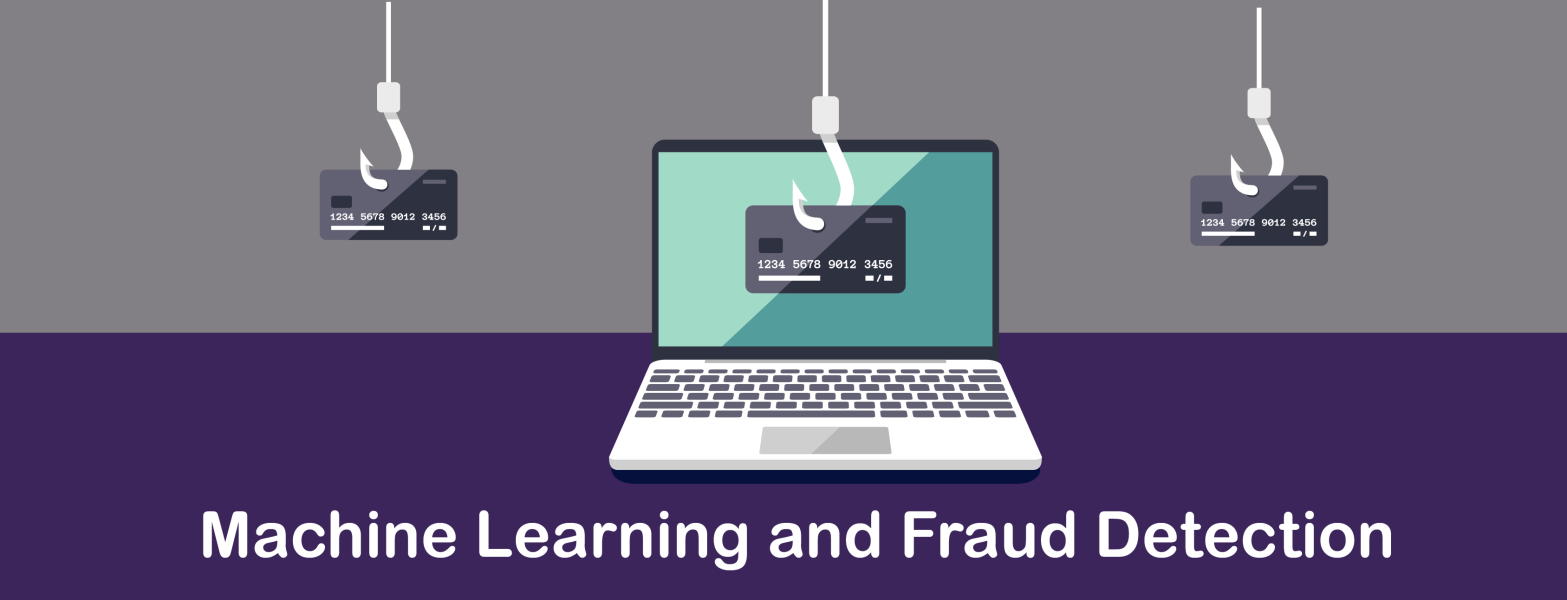

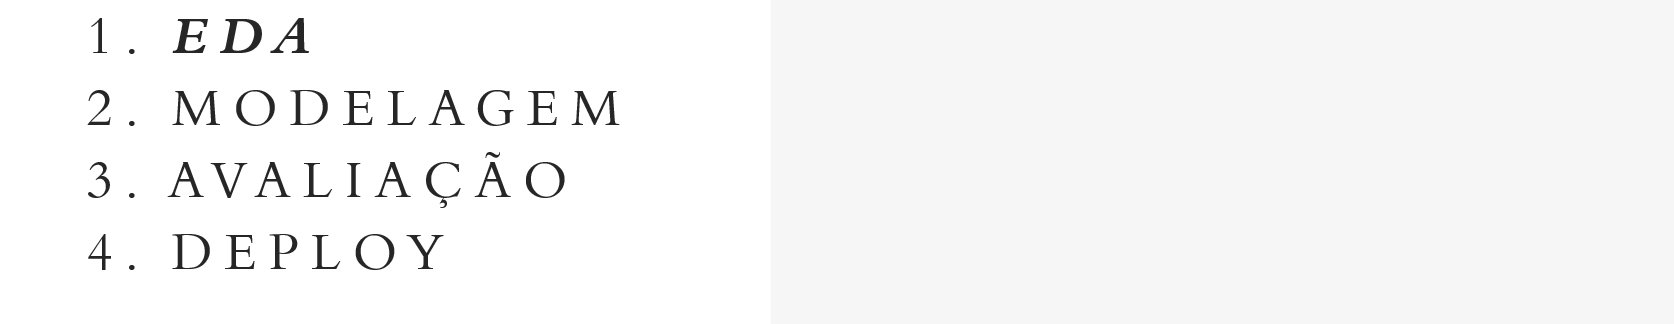

In [1]:
import pandas as pd # type: ignore
import datetime as dt
import numpy as np # type: ignore
import missingno as msno # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

Carrega e verifica o tipo de cada coluna no dataframe

In [2]:
df = pd.read_csv('dados.csv')

In [3]:
df.head(10)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,fecha,monto,score,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0
5,4,0.7359,42727.15,50.0,0.000000,47.0,BR,1,Kit Gamer Teclado Hedfone Mouse E Mousepad,cat_9d78e2e,0.571502,2798.0,506.0,1,NaN,Y,2020-04-13 18:42:28,28.00,32,0
6,4,0.5962,7121.78,2.0,0.398000,0.0,BR,11,"Corpinho Avulso Joseph, Josepha Ou Placa Sem Sexo",cat_5d6059e,0.204991,127.0,125.0,0,NaN,N,2020-03-22 19:20:24,10.56,71,0
7,4,0.6806,1656.95,50.0,1.043077,0.0,BR,11,Tripa Para Fazer Linguiça - 45 Metros Long Short,cat_e686ce3,0.569230,363.0,224.0,0,NaN,N,2020-04-12 11:49:54,6.13,81,0
8,4,0.5893,311762.23,6.0,0.000000,15.0,AR,2,Soldadora Inverter 180 A + Máscara + 2 Esc. Ma...,cat_bfe5d9b,0.897001,4661.0,826.0,1,Y,Y,2020-04-20 22:58:52,142.71,64,0
9,4,0.4759,40143.12,50.0,0.000000,41.0,AR,3,Gamepad Joystick Para Telefono Celular Android...,cat_5d79fb9,0.735790,4701.0,940.0,1,NaN,Y,2020-03-11 15:06:38,30.48,60,0


Transforma a coluna "fecha" para o formato datetime. Cria a coluna hora que indica a hora da compra.

In [4]:
df = df.assign(fecha = df.fecha.apply(lambda x:dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")))
df = df.assign(hora = df.fecha.dt.hour+df.fecha.dt.minute/60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   a       150000 non-null  int64         
 1   b       137016 non-null  float64       
 2   c       137016 non-null  float64       
 3   d       149635 non-null  float64       
 4   e       150000 non-null  float64       
 5   f       149989 non-null  float64       
 6   g       149806 non-null  object        
 7   h       150000 non-null  int64         
 8   i       150000 non-null  object        
 9   j       150000 non-null  object        
 10  k       150000 non-null  float64       
 11  l       149989 non-null  float64       
 12  m       149635 non-null  float64       
 13  n       150000 non-null  int64         
 14  o       41143 non-null   object        
 15  p       150000 non-null  object        
 16  fecha   150000 non-null  datetime64[ns]
 17  monto   150000 non-null  floa

Aqui vamos criar duas listas para identificar colunas categóricas e numéricas.

In [6]:
cat_columns = ['a', 'g', 'i', 'j', 'o', 'n', 'p']
num_cols = ['b', 'c', 'd', 'e', 'f', 'h', 'k', 'l', 'm', 'monto', 'hora']

### Análise de Dados faltantes

Dentre todas as colunas, somente as colunas **b**,**c** e **o** contém dados faltantes.

<Axes: >

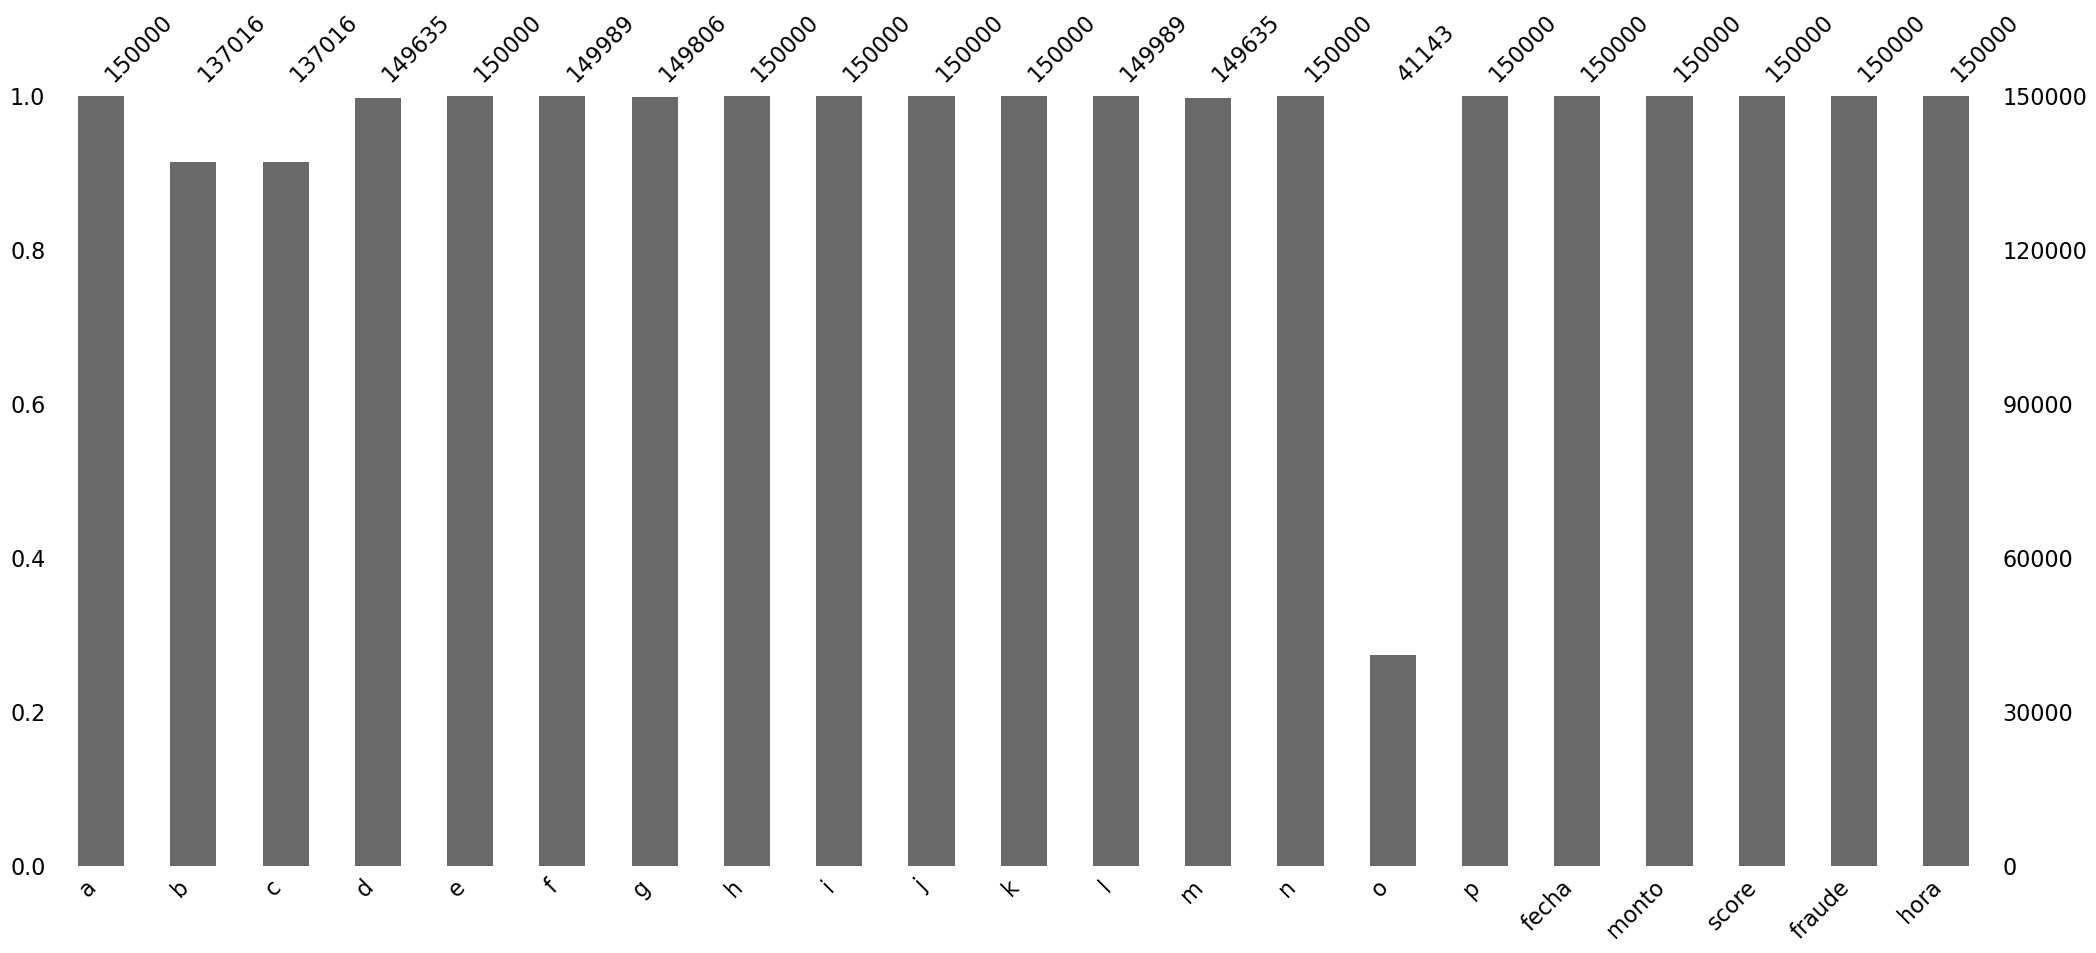

In [7]:
msno.bar(df)

A proporção de dados faltantes pode ser um fator discriminativo. De fato, observando o plot
abaixo, verificamos que a proporção de dados faltantes em b e em c para fraudes é maior. O inverso acontece com o, onde a média de dados faltantes é menos da metade quando o pagamento
é uma fraude.


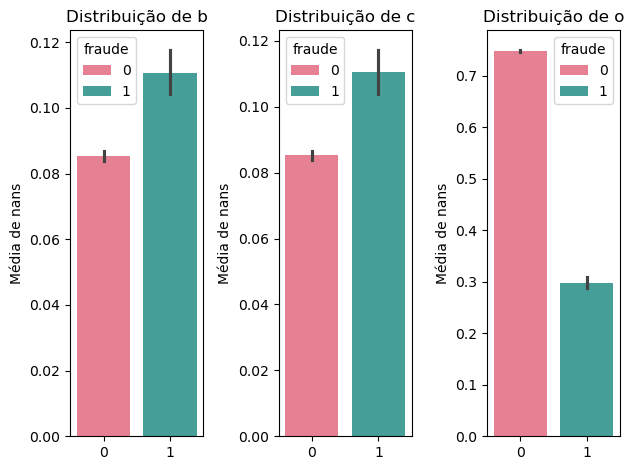

In [8]:
cols_with_nan = ['b','c', 'o']
#if nan replace with 1 otherwise 0
df_nan = pd.DataFrame(np.where(df[cols_with_nan].isnull(),1,0), columns=cols_with_nan)
df_nan = df_nan.assign(fraude = df['fraude'])

for col in cols_with_nan:
    plt.subplot(1, 3, cols_with_nan.index(col) + 1) 
    sns.barplot(df_nan, x="fraude", y=col, hue="fraude", palette='husl')
    plt.xlabel('')
    plt.title(f'Distribuição de {col}')
    plt.ylabel('Média de nans')

plt.tight_layout()
plt.show()

### Proporção de fraudes

É comum que as bases de treinamento de fraudes exibam desequilíbrio, o que pode afetar a eficácia
dos modelos de detecção. Nesse contexto, diversos métodos de oversampling e undersampling
podem ser empregados para lidar com esse desafio, buscando garantir uma representação adequada
das classes. Considerando que uma proporção de 5% não é considerada prejudicial, podemos adotar
estratégias para ajustar os pesos dos modelos, visando mitigar o impacto do desbalanceamento e
melhorar a capacidade de identificação de fraudes de forma mais precisa e eficiente

label 0: 95.0 % of datapoints
label 1: 5.0 % of datapoints


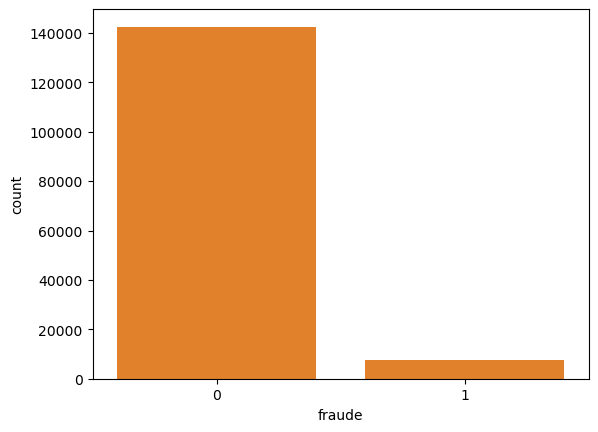

In [9]:
print('label 0:', round(
        df['fraude'].value_counts()[0]/len(df)*100, 2), '% of datapoints')
print('label 1:', round(
        df['fraude'].value_counts()[1]/len(df)*100, 2), '% of datapoints')
sns.countplot(df, x="fraude")

sns.countplot(df, x="fraude");

### Distribuição das colunas numéricas

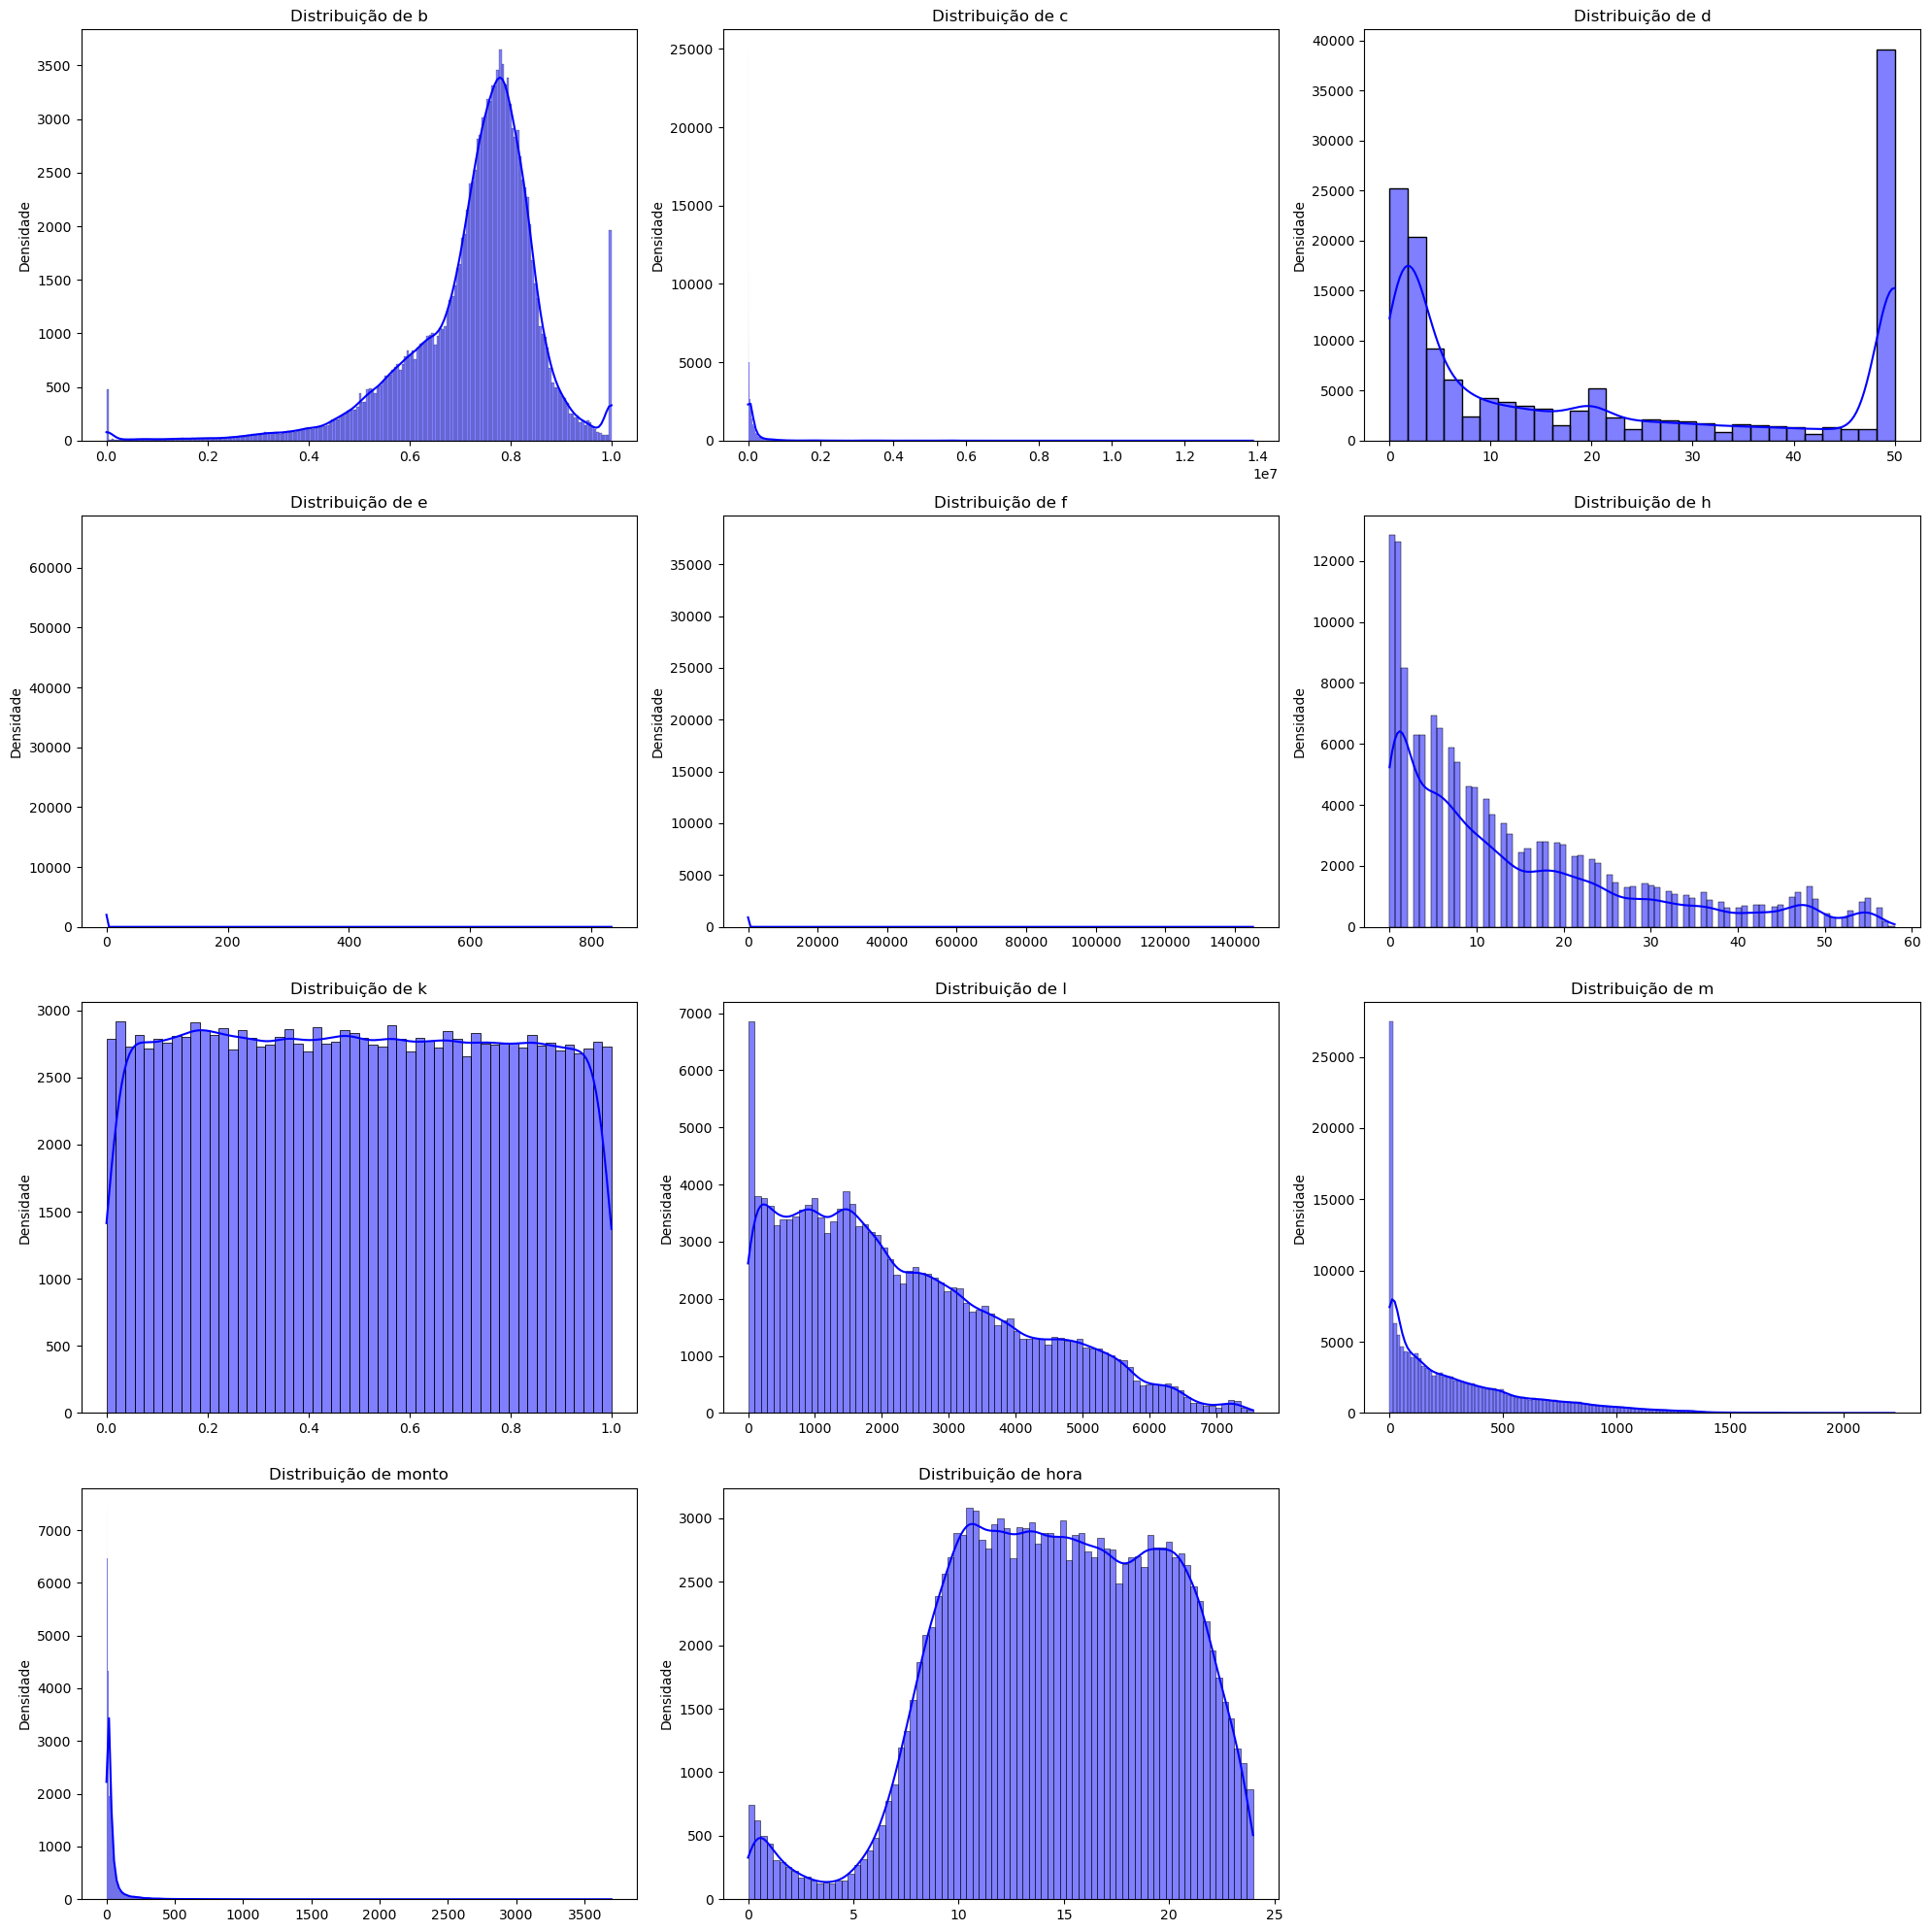

In [10]:

plt.figure(figsize=(20, 20))
for col in num_cols:
    plt.subplot(4, 3, num_cols.index(col) + 1, alpha=0.7)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel('')
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show();

Para algumas colunas, a visualização não está clara. Portanto, vamos aplicar a escala logarítmica para melhorar a compreensão.

In [11]:
log_nums_cols = ['c', 'e', 'f', 'monto']

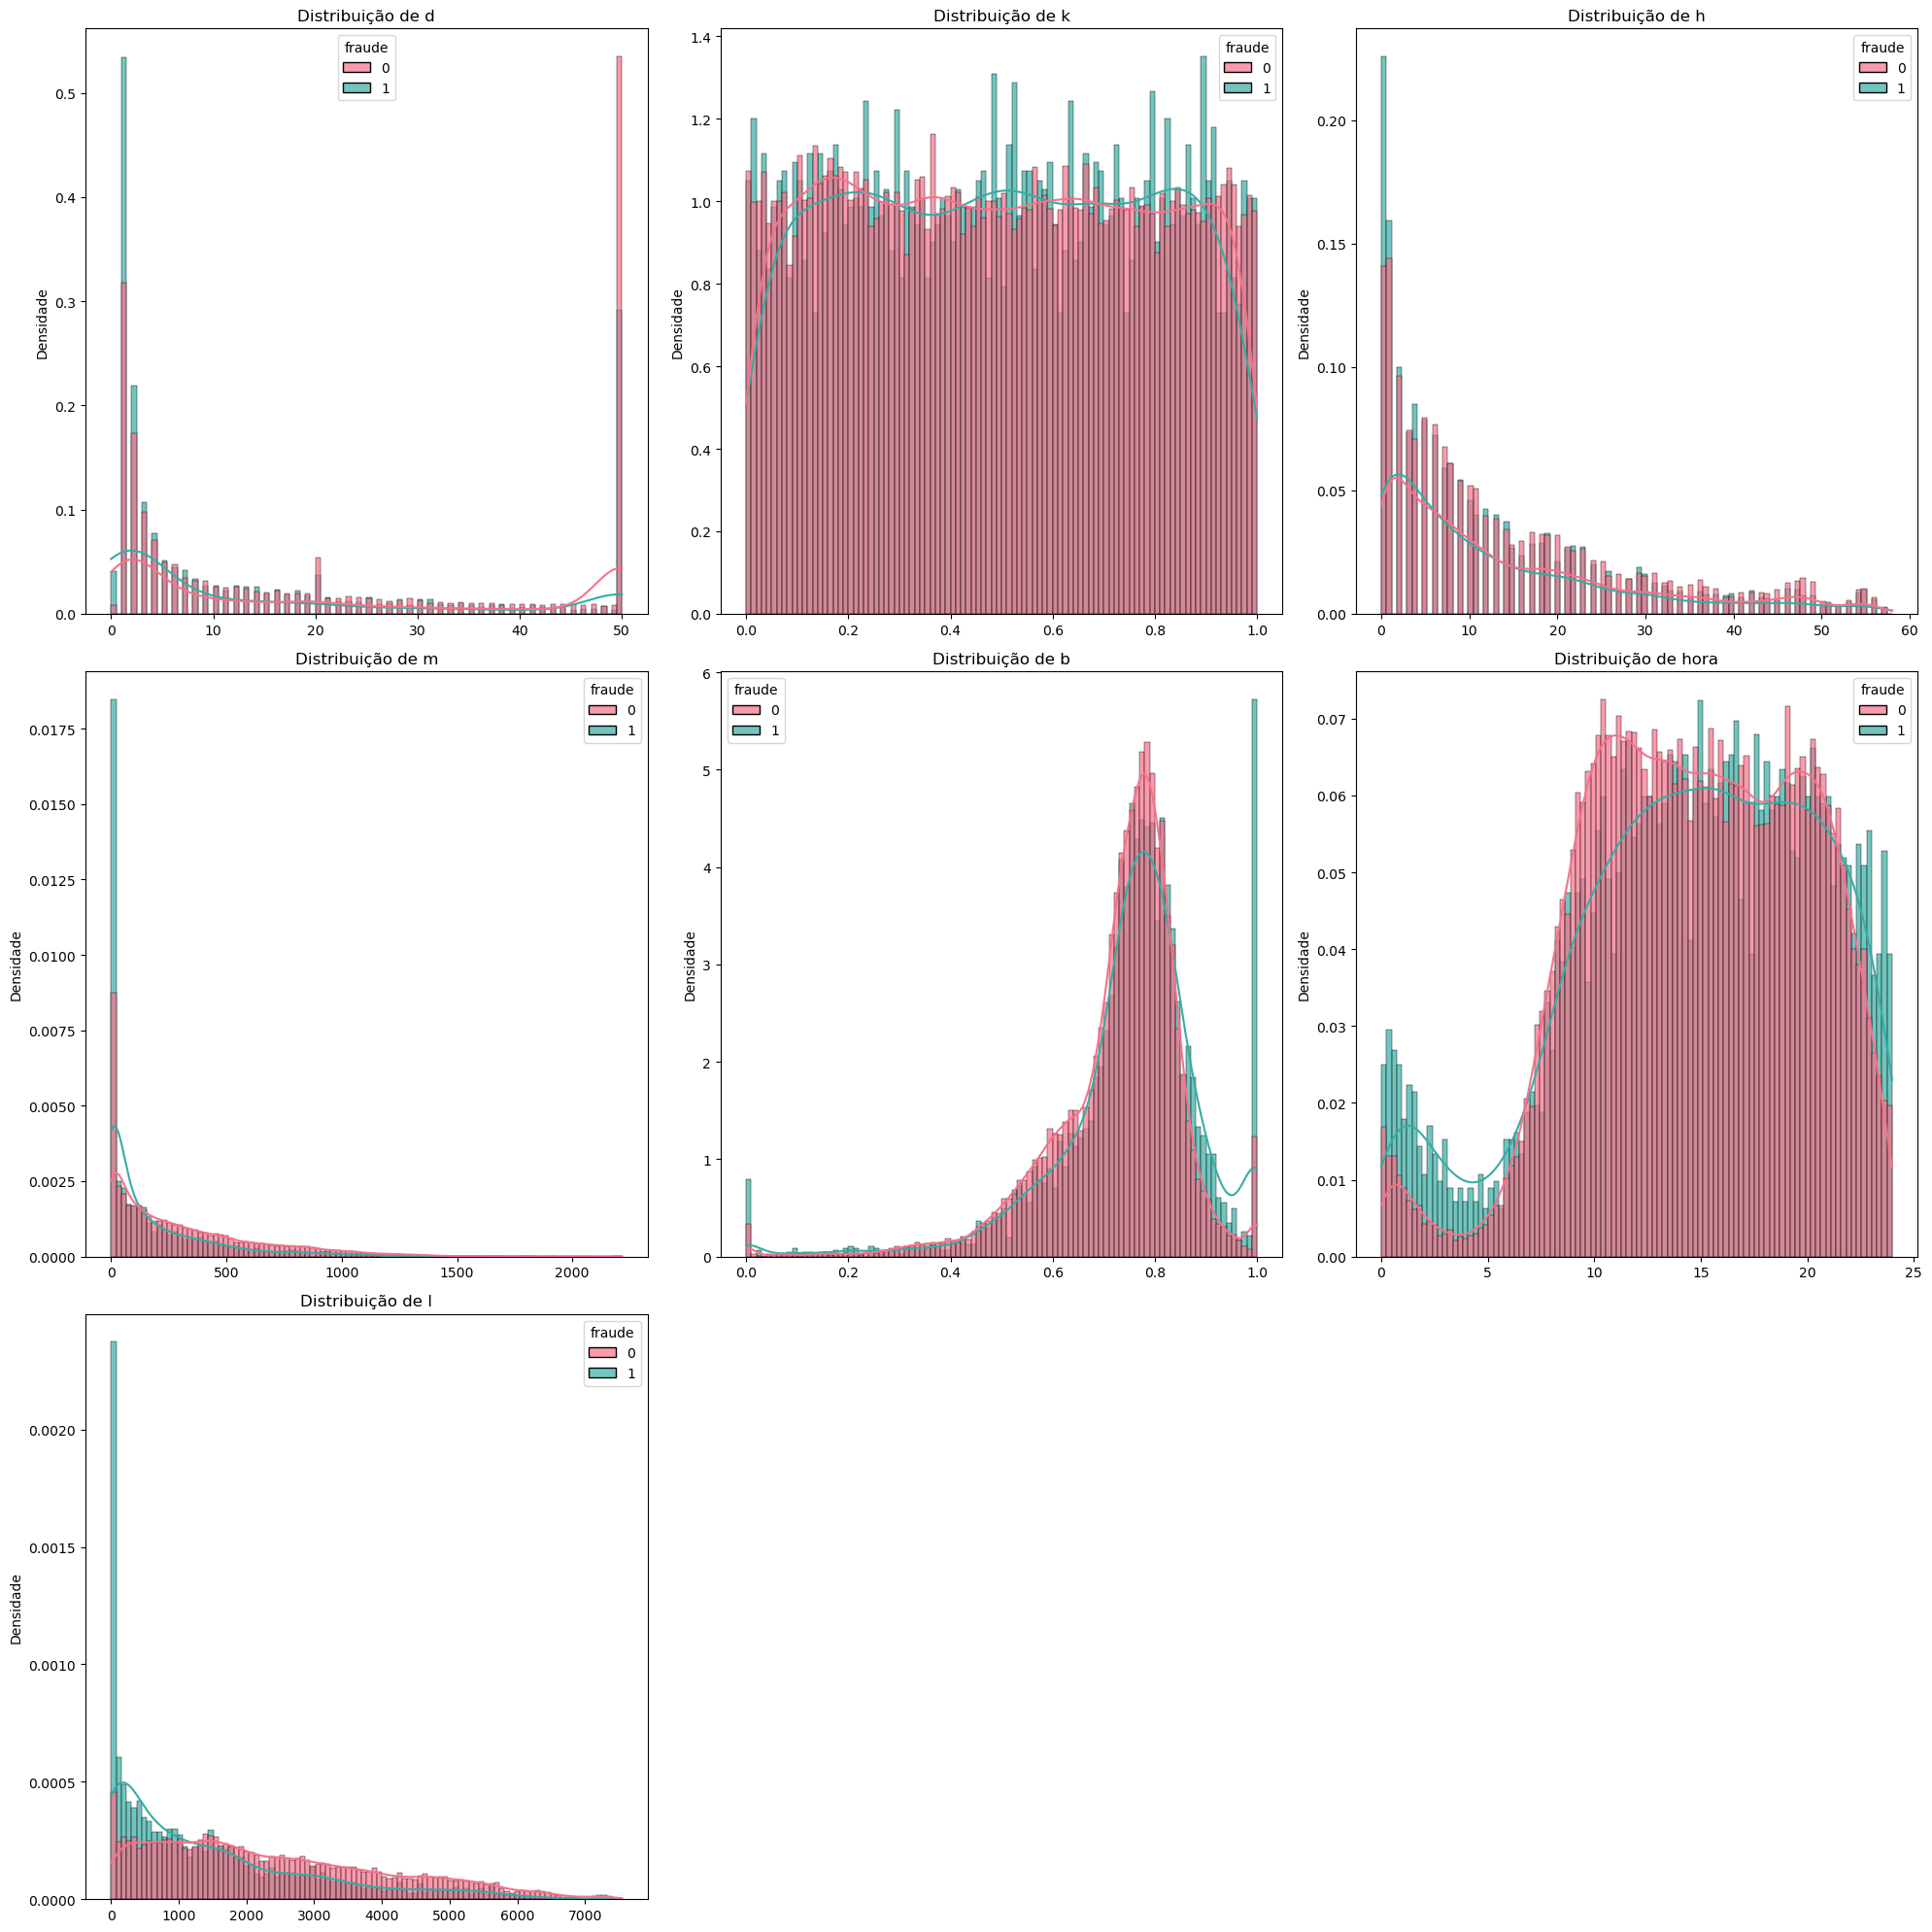

In [12]:
plt.figure(figsize=(20, 20))
cols = set(num_cols)-set(log_nums_cols)
for col in cols:
    plt.subplot(3, 3, list(cols).index(col) + 1)
    sns.histplot(data=df.dropna(), x=col, hue='fraude', kde=True, bins=100, alpha=0.7, palette='husl', stat='density', common_norm=False)
    plt.title(f'Distribuição de {col}')
    plt.xlabel('')
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

Comparar a densidade da distribuição para o caso de fraude e não-fraudes nos ajudar a entender algumas diferenças de comportamento:
- **Hora**: As probabilidades de fraude aumentam durante a noite;
- **l**, **h**, **d** e **m**: Com valores mais baixos, as chances de ocorrência de fraudes aumentam;
- **b**: As probabilidades de fraude aumentam quando o valor é igual a 1.

#### Distribuições log-normais

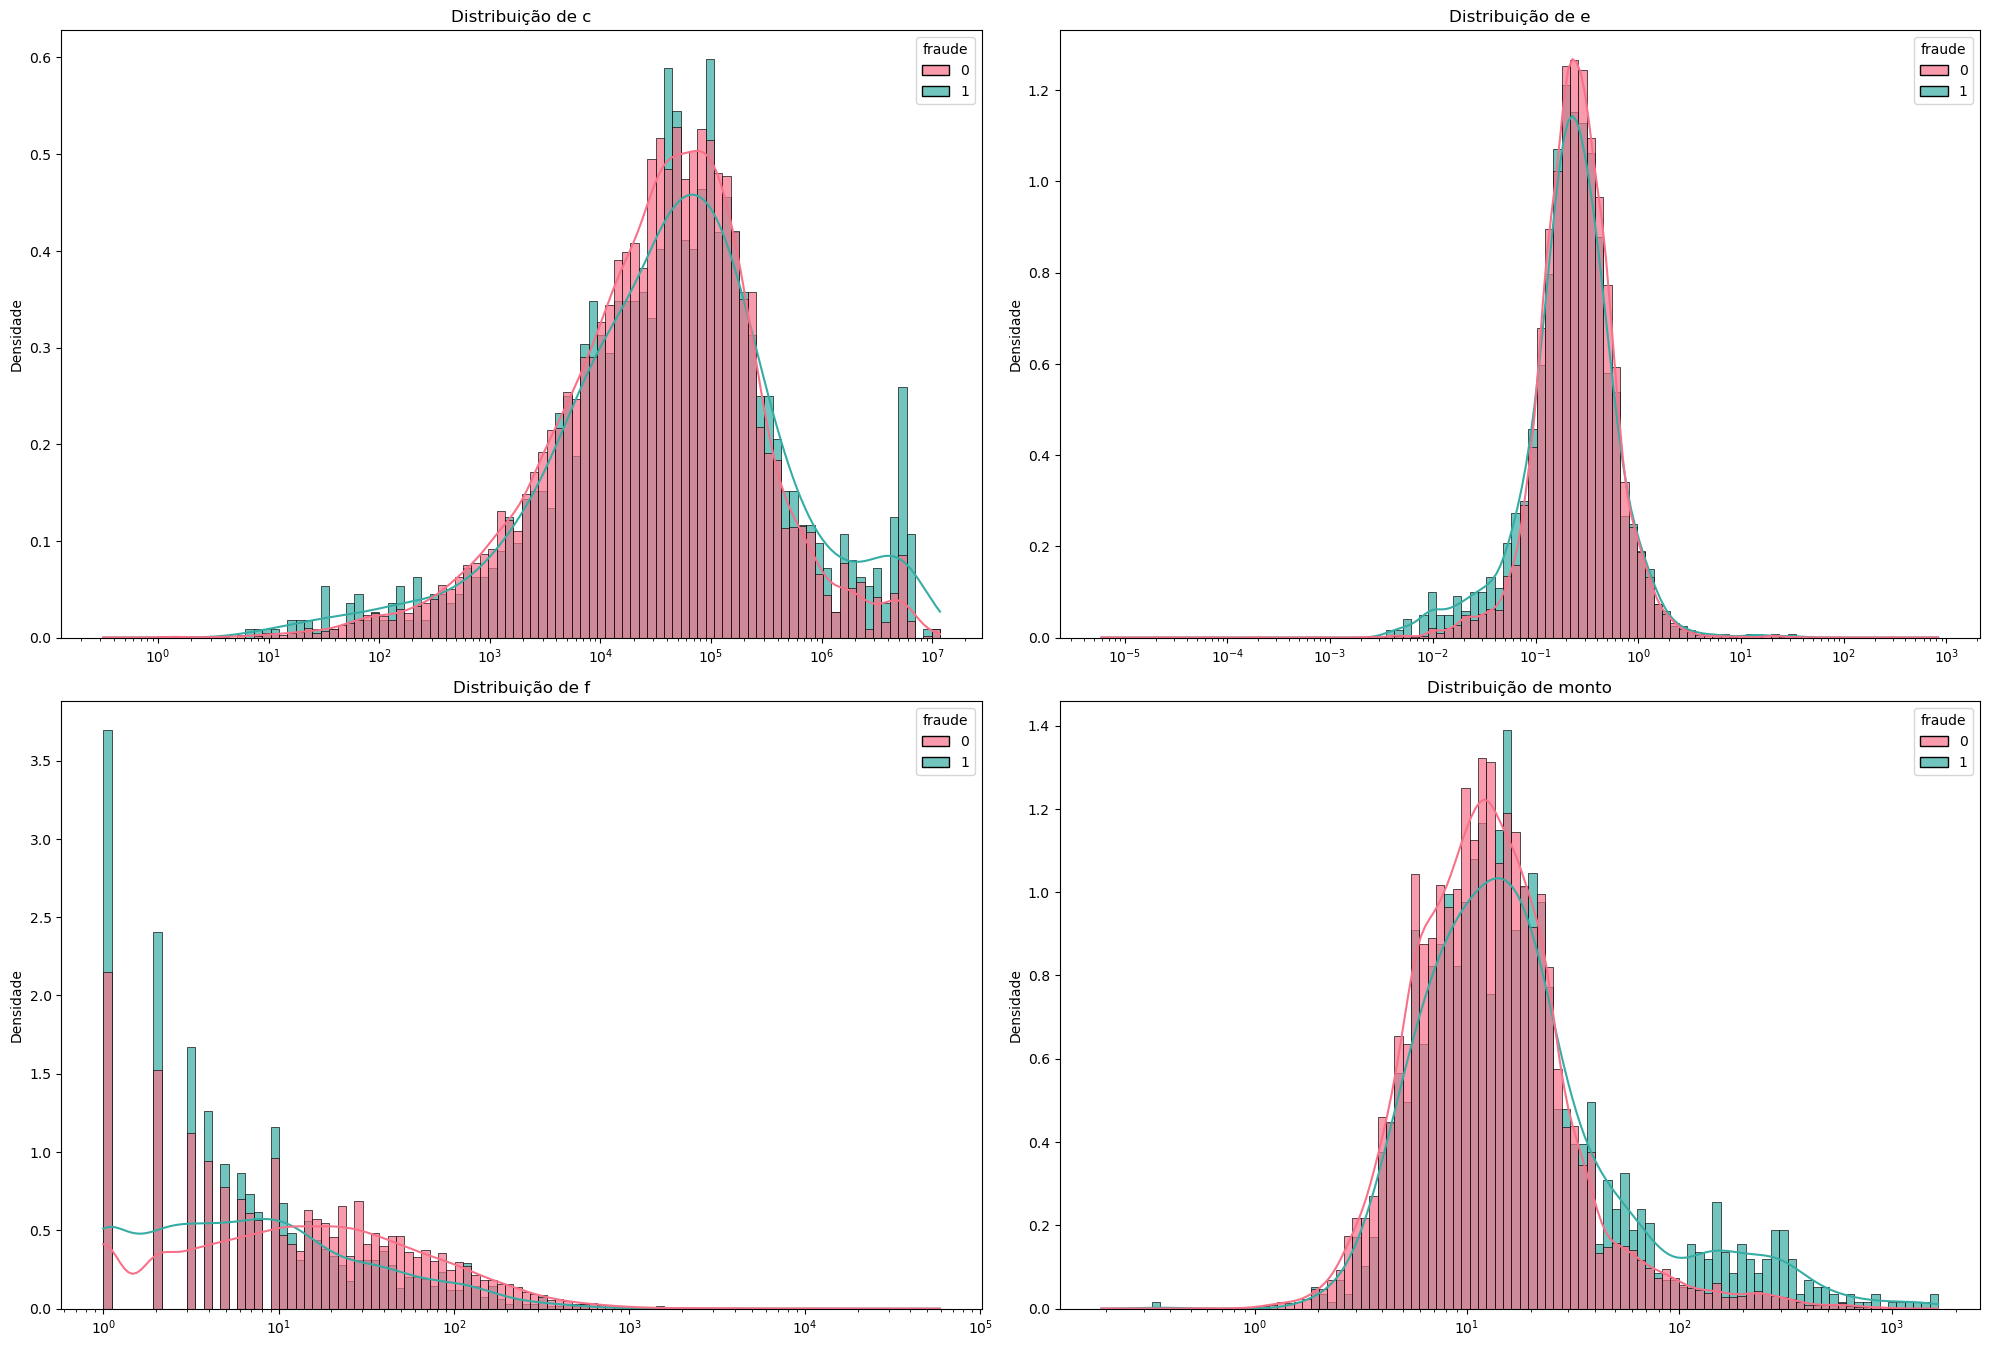

In [13]:
plt.figure(figsize=(20, 20))

# Fazendo o replace nas colunas especificadas
df_temp = df.replace({col: {0: pd.NA} for col in log_nums_cols}).dropna()
for col in log_nums_cols:
    plt.subplot(3, 2, log_nums_cols.index(col) + 1)
    sns.histplot(data=df_temp, x=col, hue='fraude', kde=True, bins=100, alpha=0.7, palette='husl', stat='density', common_norm=False, log_scale=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel('')
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

- **monto** - As chances de fraude aumentam com valores mais altos;
- **f** - As chances de fraude aumentam com valores mais baixos.

### Estudo de Correlação

A correlação de Spearman é calculada usando a fórmula:

$$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} $$

Onde:

- $\rho$ é o coeficiente de correlação de Spearman.
- $ d_i$ é a diferença entre entre os postos das observações para cada par de observações em ambas as variáveis.
- $n$ é o número de observações.

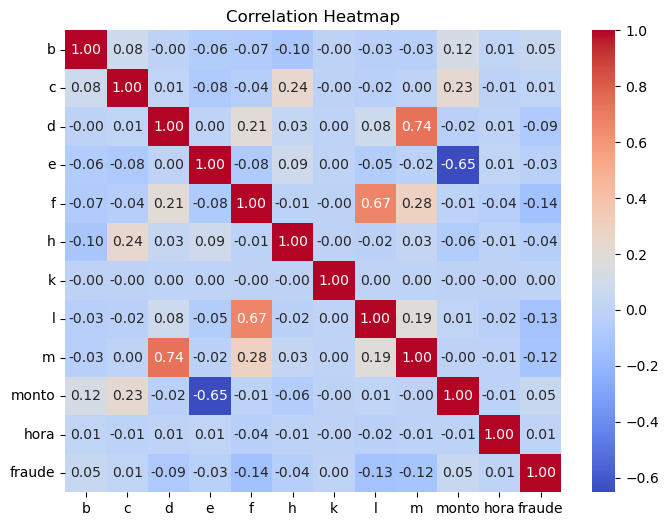

In [14]:
plt.figure(figsize=(8, 6))
df_corr = df[num_cols+['fraude']].corr('spearman')
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
muito_forte = 0.8
forte = 0.6
moderada = 0.4
fraca = 0.20

df_corr_upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
correlacoes = df_corr_upper.unstack().sort_values(ascending=False)

# Filtra as correlações muito fortes
print("Correlações muito fortes (maior que 0.8):")
print(correlacoes[(correlacoes != 1) & (correlacoes >= muito_forte)])

# Filtra as correlações fortes
print("\nCorrelações fortes (entre 0.6 e 0.79 ):")
print(correlacoes[(correlacoes != 1) & (correlacoes >= forte) & (correlacoes < muito_forte)])

# Filtra as correlações moderadas
print("\nCorrelações moderadas (entre  0.4 e 0.59):")
print(correlacoes[(correlacoes != 1) & (correlacoes >= moderada) & (correlacoes < forte)])

# Filtra as correlações fracas
print("\nCorrelações fracas  (entre 0.20 e 0.39:")
print(correlacoes[(correlacoes != 1) & (correlacoes >= fraca) & (correlacoes < moderada)])

Correlações muito fortes (maior que 0.8):
Series([], dtype: float64)

Correlações fortes (entre 0.6 e 0.79 ):
m  d    0.735300
l  f    0.669363
dtype: float64

Correlações moderadas (entre  0.4 e 0.59):
Series([], dtype: float64)

Correlações fracas  (entre 0.20 e 0.39:
m      f    0.284475
h      c    0.242640
monto  c    0.230002
f      d    0.210739
dtype: float64


A análise de correlação é útil para eliminar variáveis redundantes ou irrelevantes do conjunto de
dados, o que pode melhorar o desempenho do modelo e reduzir a complexidade computacional. No
entanto, é importante observar que a correlação não implica causalidade. Mesmo que duas variáveis
estejam fortemente correlacionadas, isso não significa necessariamente que uma causa a outra. A
correlação apenas descreve a relação estatística entre as variáveis, e é necessário realizar análises
adicionais para determinar a relação causal, se houver.

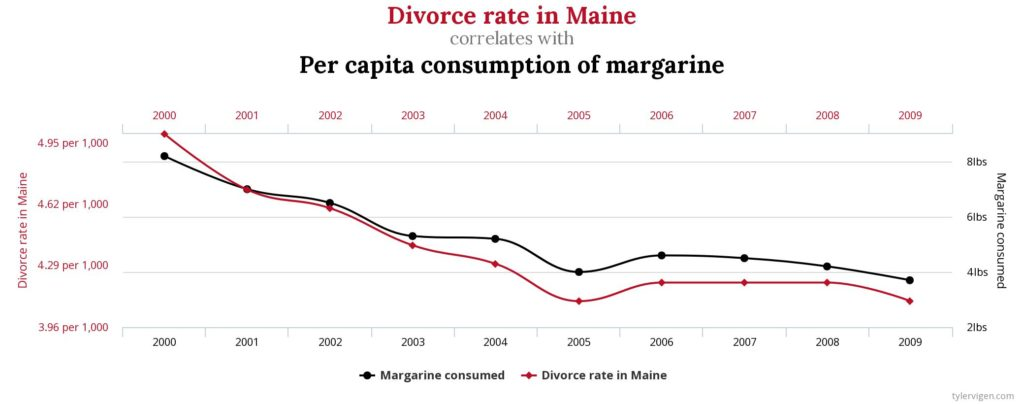

### Análise Temporal

In [16]:
df['data_dia'] = df['fecha'].dt.strftime('%Y-%m-%d')
print("Essa base contém ", len(df), "pagamentos")
print("A data mais antiga é", min(df["data_dia"]))
print("A data mais recente é", max(df["data_dia"]))

Essa base contém  150000 pagamentos
A data mais antiga é 2020-03-08
A data mais recente é 2020-04-21


In [17]:
df_conversao = df.groupby(["data_dia", "fraude"]).agg({"monto": 'sum'}).reset_index()
df_conversao

,data_dia,fraude,monto
0,2020-03-08,0,113830.82
1,2020-03-08,1,9798.05
2,2020-03-09,0,190010.34
3,2020-03-09,1,14666.02
4,2020-03-10,0,182384.29
...,...,...,...
85,2020-04-19,1,9028.48
86,2020-04-20,0,208400.31
87,2020-04-20,1,23163.98
88,2020-04-21,0,193130.16


In [18]:
import plotly.graph_objs as go

soma_fraudes = df[df['fraude'] == 1].groupby('data_dia')['monto'].sum()
soma_nao_fraudes = df[df['fraude'] == 0].groupby('data_dia')['monto'].sum()

# Plotando o gráfico com Plotly
fig = go.Figure()

fig.add_trace(go.Bar(x=soma_fraudes.index, y=soma_fraudes, name='Fraudes'))
fig.add_trace(go.Bar(x=soma_nao_fraudes.index, y=soma_nao_fraudes, name='Não Fraudes'))

fig.update_layout(title='Soma do Montante por Dia',
                  xaxis_title='Data Dia',
                  yaxis_title='Soma',
                  barmode='stack')

fig.show()

In [19]:
import plotly.express as px
per_monto_fraudes= soma_fraudes/soma_nao_fraudes

fig = px.line(per_monto_fraudes, x=per_monto_fraudes.index, y='monto', title='Percentual do montante que são fraudes')
fig.update_xaxes(title='Dia')
fig.update_yaxes(title='Porcentagem')
fig.show()

Durante a análise do gráfico que representa o percentual de fraudes por dia, foi observado que em determinados períodos temporais (21-03, 03-04, 15-04), a incidência de fraudes foi significativamente reduzida, denotando um baixo volume de ocorrências fraudulentas. Em contrapartida, em outras janelas temporais, verificou-se uma elevação considerável no número de fraudes registradas (01-04 por exemplo), indicando a presença de períodos com uma incidência substancialmente maior de atividades fraudulentas. Esta variabilidade nos níveis de fraudes ao longo do tempo sugere a influência de fatores dinâmicos ou sazonais que podem impactar a segurança e a integridade do sistema ou processo em análise.

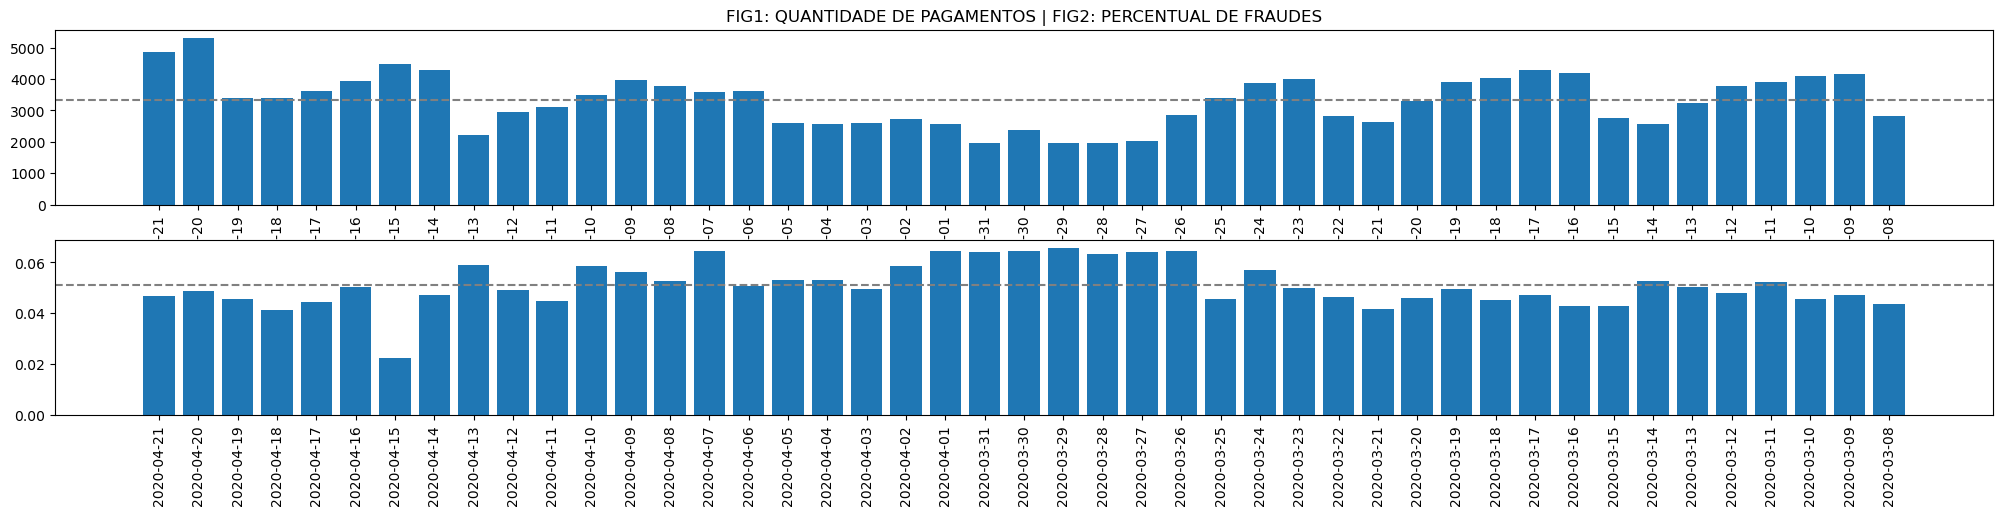

In [20]:
df_conversao_dia = df.groupby("data_dia").agg({"j": 'count', "fraude": 'sum'}).reset_index()
df_conversao_dia["conversao_per"] = df_conversao_dia["fraude"]/df_conversao_dia["j"]
df_conversao_dia=df_conversao_dia.sort_values("data_dia", ascending = False).rename(columns={'j': 'n_pagamentos', 'fraude': 'n_fraudes'})

plt.figure(figsize=(25, 5))

# QUANTIDADE DE VENDAS POR PRAÇA:
plt.subplot(211)
df_conversao_dia=df_conversao_dia.sort_values("data_dia", ascending = False)
plt.bar(df_conversao_dia["data_dia"], df_conversao_dia["n_pagamentos"])
plt.axhline(y=df_conversao_dia.n_pagamentos.mean(), color='gray', linestyle='--')
plt.title("FIG1: QUANTIDADE DE PAGAMENTOS | FIG2: PERCENTUAL DE FRAUDES")
plt.xticks(rotation=90)

# % CONVERSÃO POR PRAÇA:
plt.subplot(212)
plt.xticks(rotation=90)
plt.bar(df_conversao_dia["data_dia"], df_conversao_dia["conversao_per"])
plt.axhline(y=df_conversao_dia.conversao_per.mean(), color='gray', linestyle='--');


In [21]:
from scipy.stats import pearsonr
pearsonr(df_conversao_dia['n_pagamentos'], df_conversao_dia['conversao_per'])

PearsonRResult(statistic=-0.5349408710592065, pvalue=0.0001532036208505364)

Com significância estatística (p-value<0.05) pode-se dizer que há uma correlação inversa moderada entre o número de pagamentos e o percentual de fraudes por dia. Uma possível explicação é que, quando ocorre um aumento significativo no número de pagamentos, o número de fraudes não crescem na mesma proporção, diminuindo o percentual.

### Distribuição das colunas categóricas

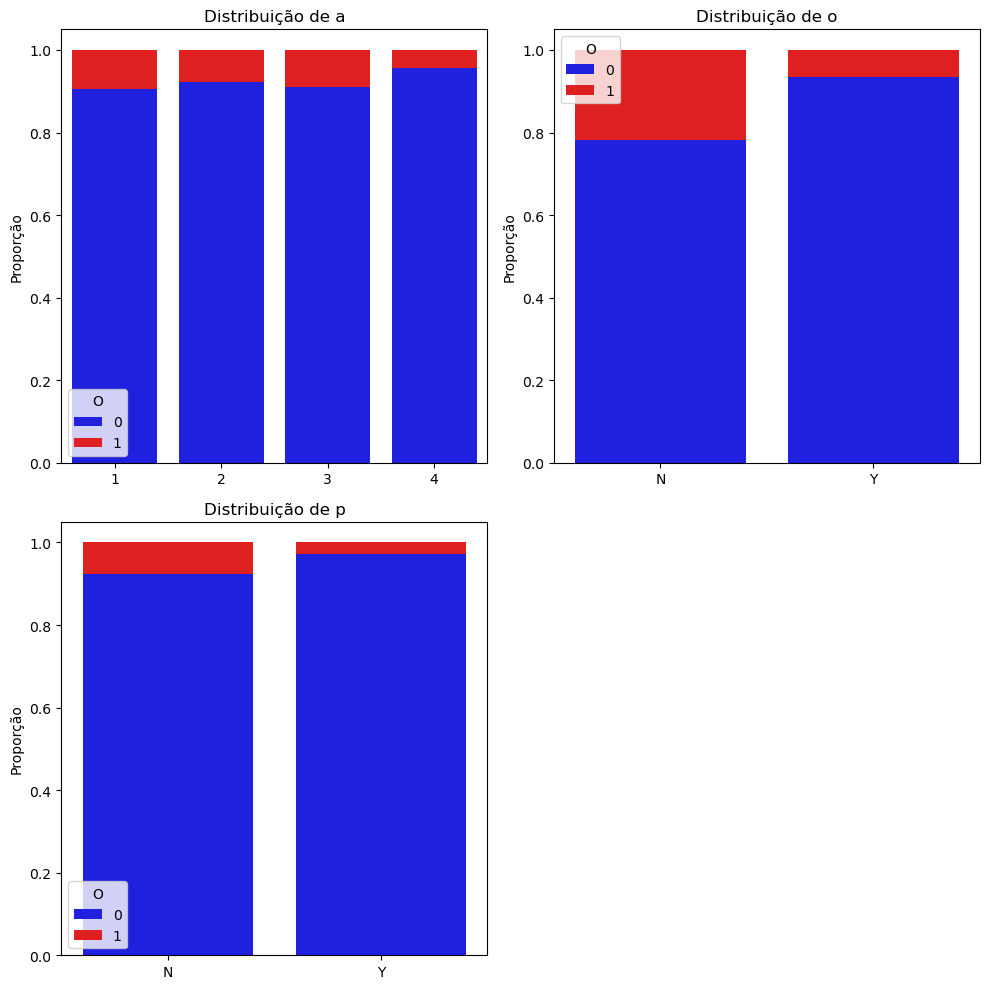

In [22]:

plt.figure(figsize=(10, 10))

# Fazendo o replace nas colunas especificadas
for i, col in enumerate(['a', 'o', 'p'], start=1):
    df_temp = df.groupby(col)['fraude'].value_counts(normalize=True).unstack().reset_index()
    df_temp['fraude'] = df_temp.index
    plt.subplot(2, 2, i)
    sns.barplot(data=df_temp, x=col, y=0, color='b', label='0')
    sns.barplot(data=df_temp, x=col, y=1, color='r', label='1', bottom=df_temp[0])
    plt.title(f'Distribuição de {col}')
    plt.xlabel('')
    plt.ylabel('Proporção')
    plt.legend(title='O')

plt.tight_layout()
plt.show()

In [23]:
df_0 = df[df.fraude==0].sample(3000)
df_1 = df[df.fraude==1].sample(3000)
df_bal = pd.concat([df_0, df_1], axis=0)

In [24]:
import numpy as np
from scipy.stats import chi2_contingency

# Tabela de contingência
observed = np.array([[10, 2, 36],
                     [15, 25, 35]])

# Realiza o teste de qui-quadrado
chi2, p, dof, expected = chi2_contingency(observed)

# Exibe os resultados
print("Valor de qui-quadrado:", chi2)
print("Valor p:", p)
print("Graus de liberdade:", dof)
print("Valores esperados:")
print(expected)

Valor de qui-quadrado: 15.423015127803858
Valor p: 0.000447646113063948
Graus de liberdade: 2
Valores esperados:
[[ 9.75609756 10.53658537 27.70731707]
 [15.24390244 16.46341463 43.29268293]]


- **a** - Menor proporçao de fraudes para valor igual a 4, em comparação com outros valores;
- **o** e **p** - Menor proporção de fraudes para Y em em comparação com N.

Para uma análise mais completa e para validar a significância estatística das conclusões sobre a diferença de proporções, é comum realizar um teste de hipóteses, usando o teste qui-quadrado.

### Teste Qui-quadrado

-Hipótese Nula (H0): Não há diferença significativa nas proporções de fraudes entre as categorias.

-Hipótese Alternativa (H1): Há diferença significativa nas proporções de fraudes entre as categorias.

$$ X^{2} = \sum\frac{(O-E)^2}{E} $$

In [43]:
from scipy.stats import chi2_contingency

def teste_qui_quadrado_normalizado(df, coluna_categorica, coluna_fraude, alpha=0.05):
    """
    Realiza o teste qui-quadrado normalizado para avaliar diferença significativa nas proporções de fraudes entre as categorias.

    Argumentos:
    df : DataFrame
        DataFrame contendo os dados.
    coluna_categorica : str
        Nome da coluna categórica.
    coluna_fraude : str
        Nome da coluna indicando se a transação é uma fraude (1 para fraude, 0 para não fraude).
    alpha : float, opcional
        Nível de significância. O padrão é 0.05.

    Retorna:
    p_valor : float
        O p-valor do teste.
    diff_significativa : bool
        True se houver diferença significativa nas proporções de fraudes, False caso contrário.
    tabela_contingencia : DataFrame
        Tabela de contingência mostrando as proporções de fraudes e não fraudes para cada categoria.
    """

    # Criar tabela de contingência
    tabela_contingencia = pd.crosstab(df[coluna_categorica], df[coluna_fraude]).T

    # Realizar teste qui-quadrado normalizado
    chi2, p_valor, _, expected = chi2_contingency(tabela_contingencia)

    # Verificar se há diferença significativa
    diff_significativa = p_valor < alpha

    return p_valor, diff_significativa, tabela_contingencia, expected

for c in ['a', 'o', 'p']:
    print(f'----------------COLUMN {c}-------------------------')
    p_valor, diff_significativa, tabela_contingencia, expected = teste_qui_quadrado_normalizado(df_bal, c, 'fraude')

    print("P-valor:", p_valor)
    print("Diferença Significativa:", diff_significativa)
    print("\nTabela de Contingência (Proporções):")
    print(tabela_contingencia)
    print("\nEsperado:")
    print(expected)

----------------COLUMN a-------------------------
P-valor: 1.130351859541327e-26
Diferença Significativa: True

Tabela de Contingência (Proporções):
a         1    2    3     4
fraude                     
0        80  246   69  2605
1       153  462  116  2269

Esperado:
[[ 116.5  354.    92.5 2437. ]
 [ 116.5  354.    92.5 2437. ]]
----------------COLUMN o-------------------------
P-valor: 5.878550806470803e-65
Diferença Significativa: True

Tabela de Contingência (Proporções):
o          N    Y
fraude           
0        278  500
1       1512  632

Esperado:
[[ 476.5982204  301.4017796]
 [1313.4017796  830.5982204]]
----------------COLUMN p-------------------------
P-valor: 1.1672348716800473e-78
Diferença Significativa: True

Tabela de Contingência (Proporções):
p          N     Y
fraude            
0       1318  1682
1       2041   959

Esperado:
[[1679.5 1320.5]
 [1679.5 1320.5]]


In [40]:
tabela_contingencia = pd.crosstab(df_bal['a'], df['fraude']).T
tabela_contingencia

a,1,2,3,4
fraude,,,,
0,80,246,69,2605
1,153,462,116,2269


In [36]:
tabela_contingencia

fraude,0,1
p,,
N,1318,2041
Y,1682,959


In [33]:
import numpy as np
from scipy.stats import chi2_contingency

# Tabela de contingência
observed = np.array([[10, 20, 30],
                     [10, 20, 30]])

# Realiza o teste de qui-quadrado
chi2, p, dof, expected = chi2_contingency(observed)

# Exibe os resultados
print("Valor de qui-quadrado:", chi2)
print("Valor p:", p)
print("Graus de liberdade:", dof)
print("Valores esperados:")
print(expected)

Valor de qui-quadrado: 0.05317586227157881
Valor p: 0.999652744095861
Graus de liberdade: 4
Valores esperados:
[[10.27624309 19.88950276 29.83425414]
 [10.27624309 19.88950276 29.83425414]
 [10.44751381 20.22099448 30.33149171]]


### Fraudes por Região

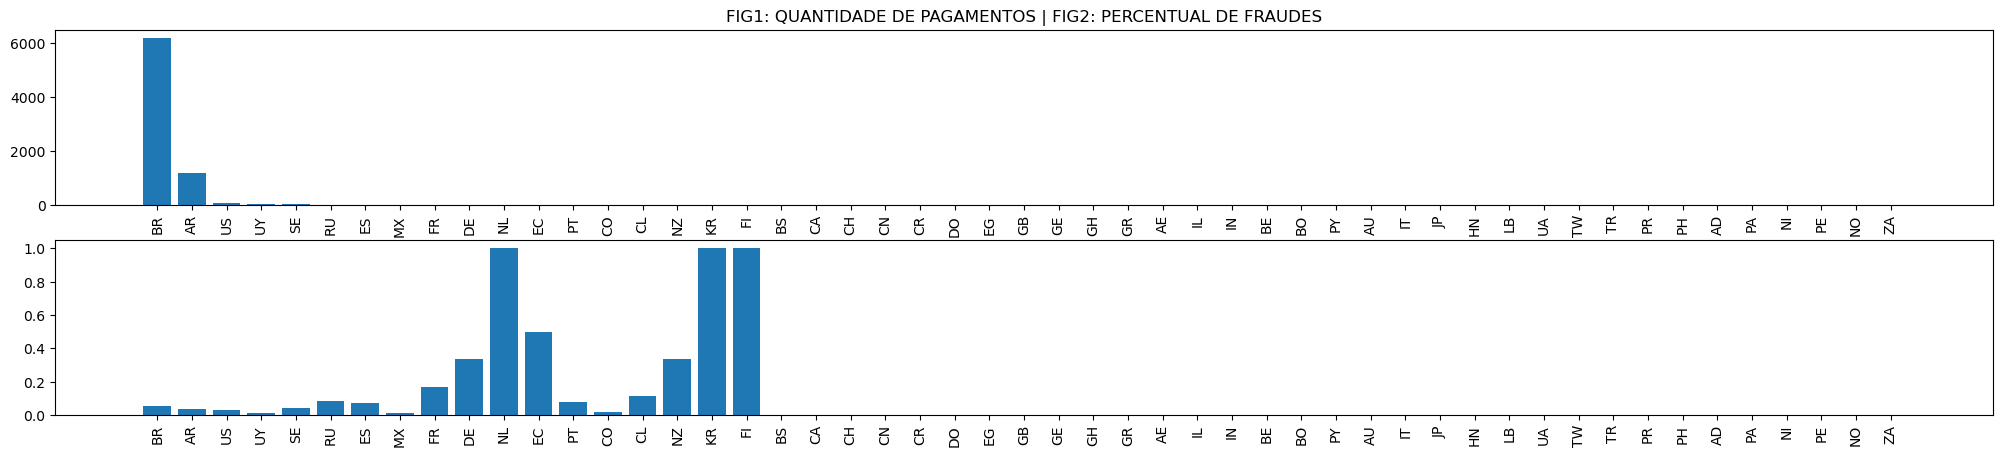

In [26]:
df_conversao_regiao = df.groupby("g").agg({"j": 'count', "fraude": 'sum'}).reset_index()
df_conversao_regiao["conversao_per"] = df_conversao_regiao["fraude"]/df_conversao_regiao["j"]
df_conversao_regiao=df_conversao_regiao.sort_values("fraude", ascending = False).rename(columns={'j': 'n_pagamentos', 'fraude': 'n_fraudes'})

plt.figure(figsize=(25, 5))

# QUANTIDADE DE VENDAS POR PRAÇA:
plt.subplot(211)
df_conversao_regiao=df_conversao_regiao.sort_values("n_fraudes", ascending = False)
plt.bar(df_conversao_regiao["g"], df_conversao_regiao["n_fraudes"])
plt.title("FIG1: QUANTIDADE DE PAGAMENTOS | FIG2: PERCENTUAL DE FRAUDES")
plt.xticks(rotation=90)

# % CONVERSÃO POR PRAÇA:
plt.subplot(212)
plt.xticks(rotation=90)
plt.bar(df_conversao_regiao["g"], df_conversao_regiao["conversao_per"]);

Algumas regiões apresentam uma taxa de ocorrência de fraudes consideravelmente elevada, enquanto outras não registram nenhuma incidência de fraude. No entanto, é imprescindível realizar uma avaliação da significância estatística dessa proporção de fraudes por região, visto que muitas delas possuem um baixo volume de transações ou pagamentos, o que pode influenciar na interpretação dos resultados.

In [27]:
from scipy.stats import binomtest

p_values = []

for idx, row in df_conversao_regiao.iterrows():
    n_sucesso = row['n_fraudes'] 
    n_amostra = row['n_pagamentos']
    
    p_value = binomtest(n_sucesso, n_amostra, p=0.5,  alternative='two-sided').pvalue
    
    # Adicionando o p-value à lista
    p_values.append(p_value)

df_conversao_regiao['p_value'] = p_values
df_conversao_regiao['is_significative'] = df_conversao_regiao['p_value'] < 0.0001

# Exibindo o DataFrame com o p-value para cada país
df_conversao_regiao

,g,n_pagamentos,n_fraudes,conversao_per,p_value,is_significative
6,BR,111628,6162,0.055201,0.000000e+00,True
2,AR,31964,1179,0.036885,0.000000e+00,True
48,US,2273,70,0.030796,0.000000e+00,True
49,UY,2967,29,0.009774,0.000000e+00,True
44,SE,358,15,0.041899,4.113443e-82,True
43,RU,73,6,0.082192,3.947261e-14,True
18,ES,69,5,0.072464,4.119231e-14,True
32,MX,236,3,0.012712,3.968030e-65,True
20,FR,18,3,0.166667,7.537842e-03,False
14,DE,9,3,0.333333,5.078125e-01,False


Com base nesta tabela, é possível observar que alguns países apresentam uma significância estatística em relação ao número de fraudes (considerando p-value<0.0001), enquanto outros não. Isso significa que, para esses países, o número de fraudes identificado não é atribuível ao acaso, e podemos assegurar que a proporção indicada é a propoção esperada de fraudes para estes países.

Com base nessas informações, temos o gráfico revisado:

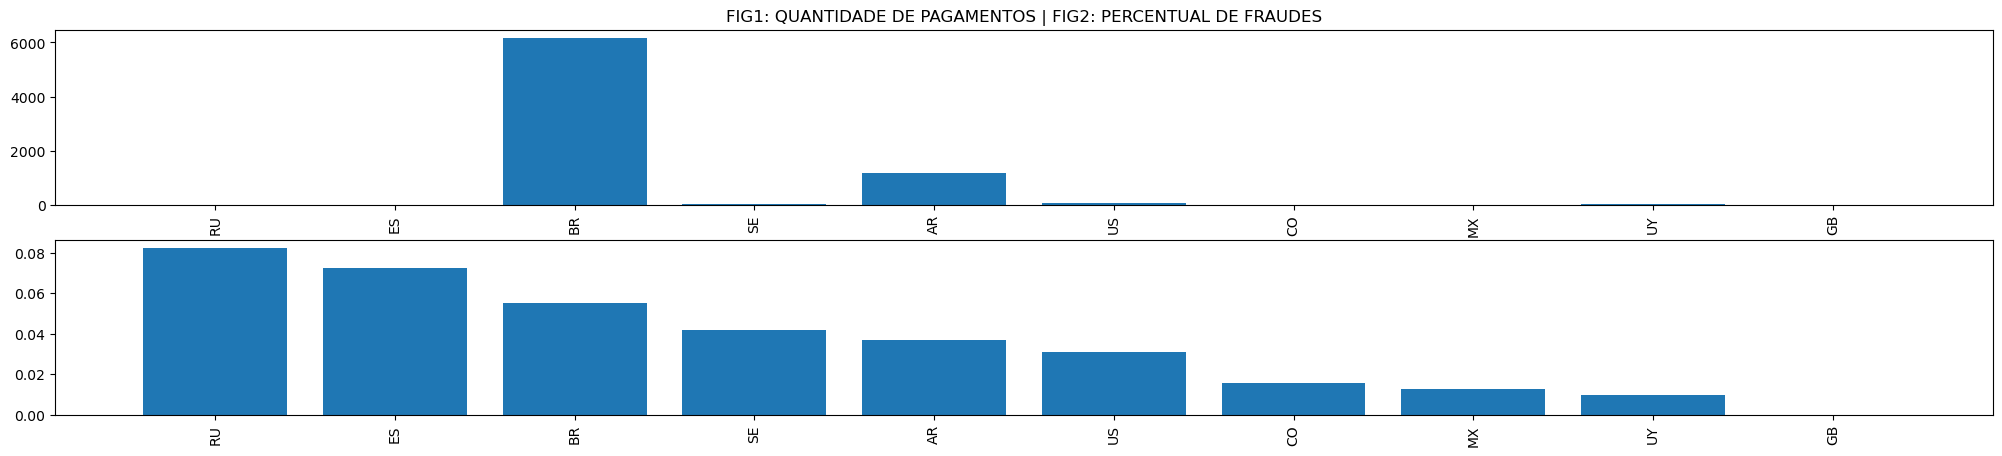

In [28]:
df_conversao_regiao_new = df_conversao_regiao[df_conversao_regiao.is_significative]

plt.figure(figsize=(25, 5))

# QUANTIDADE DE VENDAS POR PRAÇA:
plt.subplot(211)
df_conversao_regiao_new=df_conversao_regiao_new.sort_values("conversao_per", ascending = False,)
plt.bar(df_conversao_regiao_new["g"], df_conversao_regiao_new["n_fraudes"])
plt.title("FIG1: QUANTIDADE DE PAGAMENTOS | FIG2: PERCENTUAL DE FRAUDES")
plt.xticks(rotation=90)

# % CONVERSÃO POR PRAÇA:
plt.subplot(212)
plt.xticks(rotation=90)
plt.bar(df_conversao_regiao_new["g"], df_conversao_regiao_new["conversao_per"]);